# Exploratory Data Anaysis of the Olympics Dataset.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew
import statistics

1) The shape of the dataset.

In [7]:
df = pd.read_csv('olympics.csv')

print(df.shape)

(271116, 17)


2) Age column describe.

In [8]:
olympics = pd.read_csv('olympics.csv')

print(olympics['Age'].describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


3) The list of columns that have numeric datatypes.

In [9]:
olympics = pd.read_csv('olympics.csv')

num_columns = olympics.select_dtypes(include=[np.number])

print(num_columns.columns.tolist())

['ID', 'Age', 'Height', 'Weight', 'Year']


4) The columns that contain null values along with the count of null values present in each column.

In [10]:
olympics = pd.read_csv('olympics.csv')

null_counts = olympics.isnull().sum()

for column, count in null_counts.items():
    if count>0:
        print(f"{column} - {count}")

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


5) The shape of the dataset after performing the missing value handling operations.

In [11]:
olympics = pd.read_csv('olympics.csv')

columns_to_drop = ['Height', 'Weight', 'notes']

olympics_1 = olympics.drop(columns = columns_to_drop, axis = 1)

olympics_2 = olympics_1.dropna(subset=['region'])

print(olympics_2.shape)


(270746, 14)


6) Replacing the missing values with 'DNW'.

In [12]:
olympics = pd.read_csv('olympics.csv')

olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)

olympics = olympics[pd.notnull(olympics['region'])]

olympics['Medal'].fillna('DNW', inplace=True)

countofmedals = olympics['Medal'].value_counts()
print(countofmedals)

Medal
DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: count, dtype: int64


7) Handling missing values of Age column using mean.

In [13]:
olympics = pd.read_csv('olympics.csv')
olympics.drop(columns=["notes", "Height", "Weight"], inplace=True)
olympics = olympics[pd.notnull(olympics['region'])]
olympics['Medal'].fillna('DNW', inplace = True)

mean_age_by_sport = olympics.groupby('Sport')['Age'].mean()

for sport, mean_age in mean_age_by_sport.items():
    olympics.loc[olympics['Sport'] == sport, 'Age'].fillna(mean_age, inplace = True)

final_mean_age = olympics['Age'].mean()

print(round(final_mean_age))

26


8)  The probability distribution of the Age column for swimming in the Sport column.

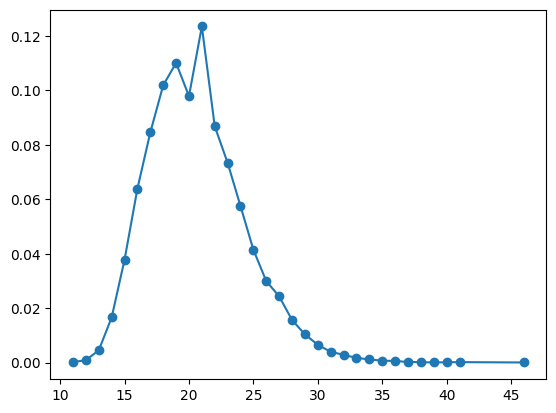

20 to 25


In [16]:
olympics = pd.read_csv('olympics_cleaned.csv')

mean_age_by_sport = olympics.groupby('Sport')['Age'].mean()

for sport, mean_age in mean_age_by_sport.items():
    olympics.loc[olympics['Sport'] == sport, 'Age'].fillna(mean_age, inplace=True)

swimming_data = olympics[olympics['Sport'] == 'Swimming']

age_distribution = swimming_data['Age'].value_counts(normalize=True).sort_index()

plt.plot(age_distribution.index, age_distribution.values, marker='o', linestyle='-')

plt.show()

print("20 to 25")

9) Skewness of overall distribution of Gold Medals tally of India.

In [18]:
olympics = pd.read_csv('olympics_cleaned.csv')

gold_india = olympics[(olympics['region']=='India') & (olympics['Medal']=='Gold')]

Skewness = gold_india['Year'].skew()

if skew(Skewness, bias = False)>0:
    print("Right Skewed")
else:
    print("Left Skewed")

Left Skewed


10) The standard deviation/error of the distribution of gold medals when the UK is hosting the Olympic games and when not hosting the games

In [20]:
df = pd.read_csv('olympics_cleaned.csv')

uk_gold = df[(df['region'] == 'UK') & (df['Medal'] == 'Gold')]
uk_gold_hosting = uk_gold[uk_gold['City'] == 'London']
uk_gold_not_hosting = uk_gold[uk_gold['City'] != 'London']

sd_hosting = statistics.stdev(uk_gold_hosting['Year'].value_counts())
sd_not_hosting = statistics.stdev(uk_gold_not_hosting['Year'].value_counts())

print(sd_hosting)
print(sd_not_hosting)

71.97453253292676
18.14528124684469


11) The standardised age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

In [22]:
olympics = pd.read_csv('olympics_cleaned.csv')

shooting_data = olympics[olympics['Sport'] == 'Shooting']

shooting_data['Standard_age'] = (shooting_data['Age'] - shooting_data['Age'].mean()) / shooting_data['Age'].std()

print("standardized mean", round(shooting_data['Standard_age'].mean()))
print("standardized standard deviation",round(shooting_data['Standard_age'].std()))

standardized mean 0
standardized standard deviation 1


<ipython-input-22-d41262bbc4b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_data['Standard_age'] = (shooting_data['Age'] - shooting_data['Age'].mean()) / shooting_data['Age'].std()


12) The correlation of Age with winning the medal.

In [24]:
olympics = pd.read_csv('olympics_cleaned.csv')

correlation = olympics['Age'].corr(olympics['Medal'] != "DNW")

# Determine if the correlation is positive or negative
if correlation > 0:
    print("Positive")
elif correlation < 0:
    print("Negative")
else:
    print("No correlation")

Positive


13) The IQR for the Age column.

In [25]:
olympics = pd.read_csv('olympics_cleaned.csv')

q1 = olympics['Age'].quantile(0.25)
q3 = olympics['Age'].quantile(0.75)

iqr = q3 - q1

print(iqr)

6.0


14) The number of times each city has hosted the Games.

City
London                    3
Athina                    3
Innsbruck                 2
Sankt Moritz              2
Paris                     2
Los Angeles               2
Lake Placid               2
Stockholm                 2
Amsterdam                 1
Berlin                    1
Oslo                      1
Cortina d'Ampezzo         1
Melbourne                 1
Roma                      1
Moskva                    1
Montreal                  1
Munich                    1
Tokyo                     1
Vancouver                 1
Grenoble                  1
Sapporo                   1
Chamonix                  1
St. Louis                 1
Seoul                     1
Barcelona                 1
Mexico City               1
Sydney                    1
Antwerpen                 1
Calgary                   1
Albertville               1
Lillehammer               1
Salt Lake City            1
Helsinki                  1
Atlanta                   1
Sarajevo                  1
Sochi          

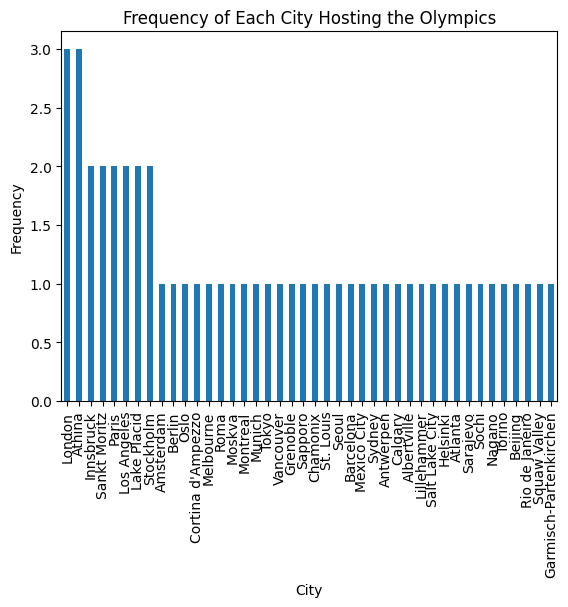

In [34]:
olympics = pd.read_csv('olympics_cleaned.csv')

olympics['Year_City'] = olympics['Year'].astype(str) + ' - ' + olympics['City']

unique_year_city_df = olympics[['Year_City']].drop_duplicates()

unique_year_city_df[['Year', 'City']] = unique_year_city_df['Year_City'].str.split(' - ', expand=True)

unique_year_city_df = unique_year_city_df.drop(columns=['Year_City'])

city_counts = unique_year_city_df['City'].value_counts()

print(city_counts)

city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency of Each City Hosting the Olympics')
plt.xticks(rotation=90)
plt.show()

15) The sport is having the most number of medals so far.

Athletics


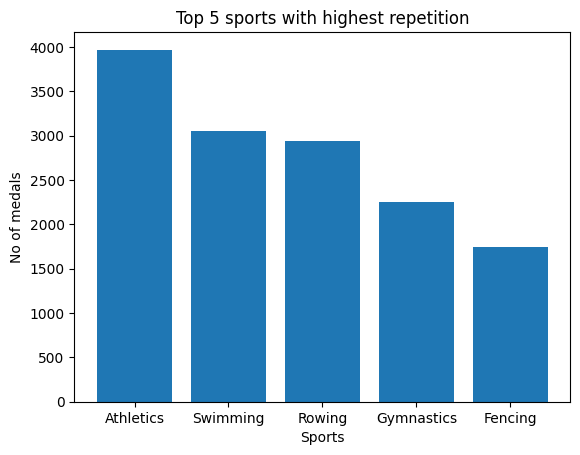

In [35]:
olympics = pd.read_csv('olympics_cleaned.csv')

olympics = olympics[~olympics['Medal'].isin(['DNW'])]

sports_count = olympics['Sport'].value_counts()

print(sports_count.nlargest(1).index[0])

top_5_sports = sports_count.nlargest(5)

plt.bar(top_5_sports.index, top_5_sports.values)

plt.xlabel('Sports')
plt.ylabel('No of medals')
plt.title('Top 5 sports with highest repetition')

plt.show()

16) The sport is having the most number of Gold medals so far.

Athletics


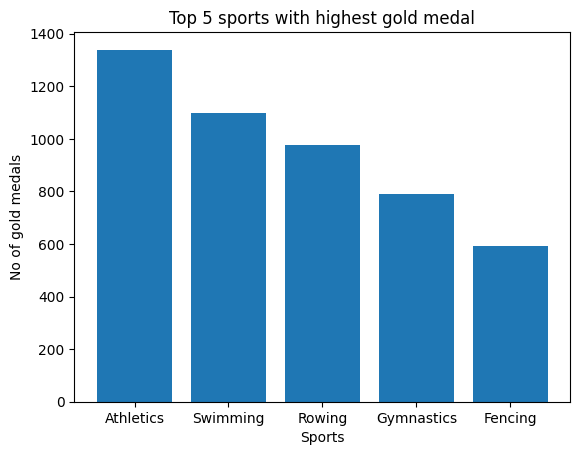

In [36]:
olympics = pd.read_csv('olympics_cleaned.csv')

olympics = olympics[olympics['Medal']== 'Gold']

sports_count = olympics['Sport'].value_counts()

print(sports_count.nlargest(1).index[0])

top_5_sports = sports_count.nlargest(5)

plt.bar(top_5_sports.index, top_5_sports.values)

plt.xlabel('Sports')
plt.ylabel('No of gold medals')
plt.title('Top 5 sports with highest gold medal')

plt.show()

17) The year in which India win the first Gold Medal in the Olympics?

In [46]:
olympics = pd.read_csv('olympics_cleaned.csv')

olympics = olympics[(olympics['Medal']== 'Gold') & (olympics['region']== 'India')]

print(min(olympics['Year']))

1924


18) Top 5 Events with Most Number of Players.

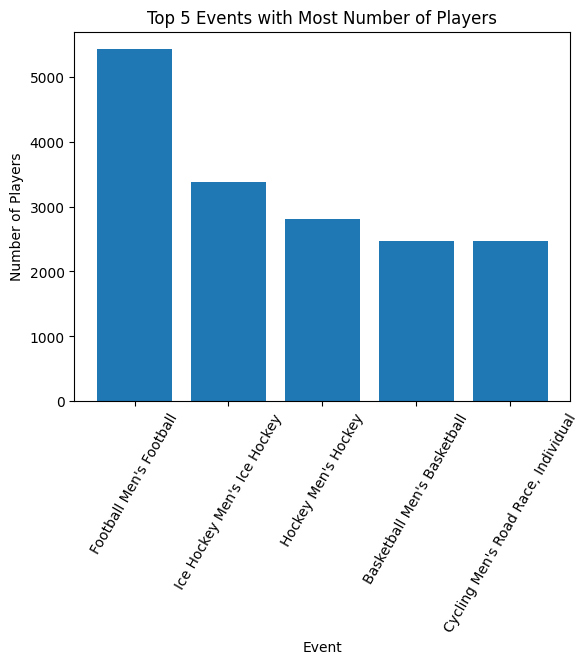

Football Men's Football


In [43]:
df = pd.read_csv('olympics_cleaned.csv')

event_count = df.groupby('Event')['ID'].nunique().sort_values(ascending=False)[:5]

plt.bar(event_count.index, event_count.values)
plt.title('Top 5 Events with Most Number of Players')
plt.xlabel('Event')
plt.ylabel('Number of Players')
plt.xticks(rotation=60)
plt.show()

most_players_sport = event_count.index[0]
print(most_players_sport)

19) Top sport which is having the most female Gold Medalists.

Swimming


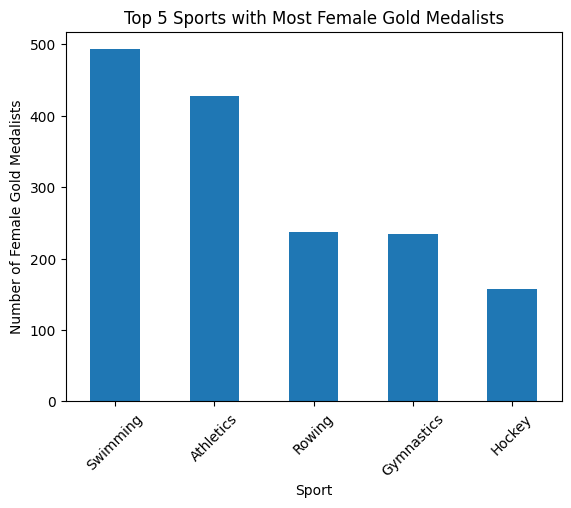

In [47]:
olympics = pd.read_csv('olympics_cleaned.csv')

female_gold_medalists = olympics[(olympics['Sex'] == 'F') & (olympics['Medal'] == 'Gold')]

top_sports_female_gold = female_gold_medalists.groupby('Sport').size().sort_values(ascending=False).head(5)
sport_most_female_gold = top_sports_female_gold.idxmax()
print(sport_most_female_gold)

top_sports_female_gold.plot(kind='bar')
plt.xlabel('Sport')
plt.ylabel('Number of Female Gold Medalists')
plt.title('Top 5 Sports with Most Female Gold Medalists')
plt.xticks(rotation=45)
plt.show()
